In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI

In [4]:
def TC(T):
 # converts K to C
    TC = T - 273.15
    return TC

In [5]:
def TK(T):
 # converts C to K
    TK = T + 273.15
    return TK

In [11]:
#define proper input parameters, give reasonable estimates for temp out of boiler
F = 'NHEPTANE' # Fluid Choice
#print('GWP100 is ', PropsSI(F,'GWP20'), 'ODP is ', PropsSI(F,'ODP'))

inlet_temperatures = []
efficiencies = []
highT = math.floor(TC(PropsSI('Tcrit', F)))

for T1 in range(175,highT):
    inlet_temperatures.append(T1)
    P1 = PropsSI('P','T|gas',TK(T1),'Q',1, F)#saturated vapor for a dry fluid, units Pa
    s1 = PropsSI('S','T|gas',TK(T1),'P',P1, F)
    h1 = PropsSI('H','T|gas',TK(T1),'P',P1, F)

    # THROUGH CONDENSER
    T4 = 35 #also an estimate in C
    P4 = PropsSI('P','T|liquid',TK(T4),'Q',0, F)
    s4 = PropsSI('S','T|liquid',TK(T4),'P',P4, F)
    h4 = PropsSI('H','T|liquid',TK(T4),'P',P4, F)

    # THROUGH TURBINE
    P2 = P4
    # let's 3assume an isentropic efficiency for turbine from Kashif's paper of 85%
    nt = 0.85
    h2s = PropsSI('H','P',P2,'S',s1, F)
    h2a = h1-nt*(h1-h2s)
    s2 = PropsSI('S','H',h2a,'P',P2, F)
    T2 = PropsSI('T','P',P2,'S',s2, F)

    # THROUGH PUMP
    P5 = P1
    # let's now assume an isentropic efficiency for pump from Kashif's paper of 65%
    np = 0.65
    h5s = PropsSI('H','P',P5,'S',s4, F)
    h5a = h4-np*(h4-h5s)
    T5 = PropsSI('T','P',P5,'H',h5a, F)
    s5 = PropsSI('S','T|liquid',T5,'P',P5, F)

    # THROUGH HXGR
    e = 0.9 #hxgr effectiveness, an estimate given by previous research
    P3 = P2
    P6 = P5
    T3 = TK(T2) - e*(TK(T2)-T5)
    h3 = PropsSI('H','P',P3,'T',T3, F)
    h6 = h2a-h3+h5a
    T6 = PropsSI('T','H',h6,'P',P6, F)
    s3 = PropsSI('S','T',T3,'P',P3, F)
    s6 = PropsSI('S','T',T6,'P',P6, F)

    #efficiency calculation
    wdot_t = h1-h2a
    wdot_p = h5a-h4
    q_h = h1-h6
    q_c = h3-h4
    eta = 100*(-wdot_t+wdot_p)/-q_h
    efficiencies.append(eta)

<function matplotlib.pyplot.show(close=None, block=None)>

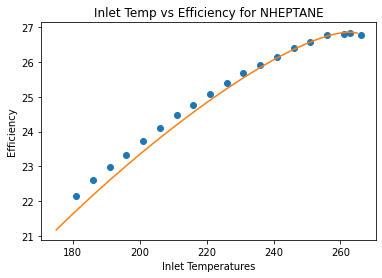

In [12]:
# graph showing efficiencies vs inlet temperature for this selected fluid
calibration_x_vals = [181,186,191,196,201,206,211,216,221,226,231,236,241,246,251,256,261,263,266]
calibration_y_vals = [22.15,22.60,22.97,23.34,23.73,24.10,24.47,24.77,25.08,25.40,25.70,25.92,26.15,26.40,26.57,26.77,26.82,26.85,26.79]
plt.figure
plt.plot(calibration_x_vals, calibration_y_vals,'o')
plt.plot(inlet_temperatures, efficiencies)
plt.xlabel("Inlet Temperatures")
plt.ylabel("Efficiency")
plt.title('Inlet Temp vs Efficiency for '+F)
plt.show